# Loading Packages and Data

In [31]:
#Basic Packages Most Python Data Analysis will Require
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
import random
import pyomo

#This allows us for our matplotlib plots to show up as cell output.
#(without this the plots we make may show up as windows that popout)
%matplotlib inline
print("Inline Functionality Set")
print('Basic Packages Loaded')

Inline Functionality Set
Basic Packages Loaded


In [32]:
#Common Descriptive Analytics Algorithms we will demonstrate in this class
from sklearn.cluster import KMeans
'Descriptive Analytics Algorithms Loaded'

'Descriptive Analytics Algorithms Loaded'

In [33]:
#Load data
df=pd.read_csv('tripadvisor_review.csv',sep=',')
df.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [29]:
categories=[' Average user feedback on \n art galleries',
' Average user feedback \n on dance clubs',
' Average user feedback on \n juice bars',
' Average user feedback on \n restaurants',
' Average user feedback on \n museums',
' Average user feedback on \n resorts',
' Average user feedback on \n parks/picnic spots',
' Average user feedback on \n beaches',
' Average user feedback on \n theaters',
' Average user feedback on \n religious institutions']

In [34]:
df.columns=['User ID']+categories

# One Dimensional Exploratory Data Analysis on Each Tourism Type

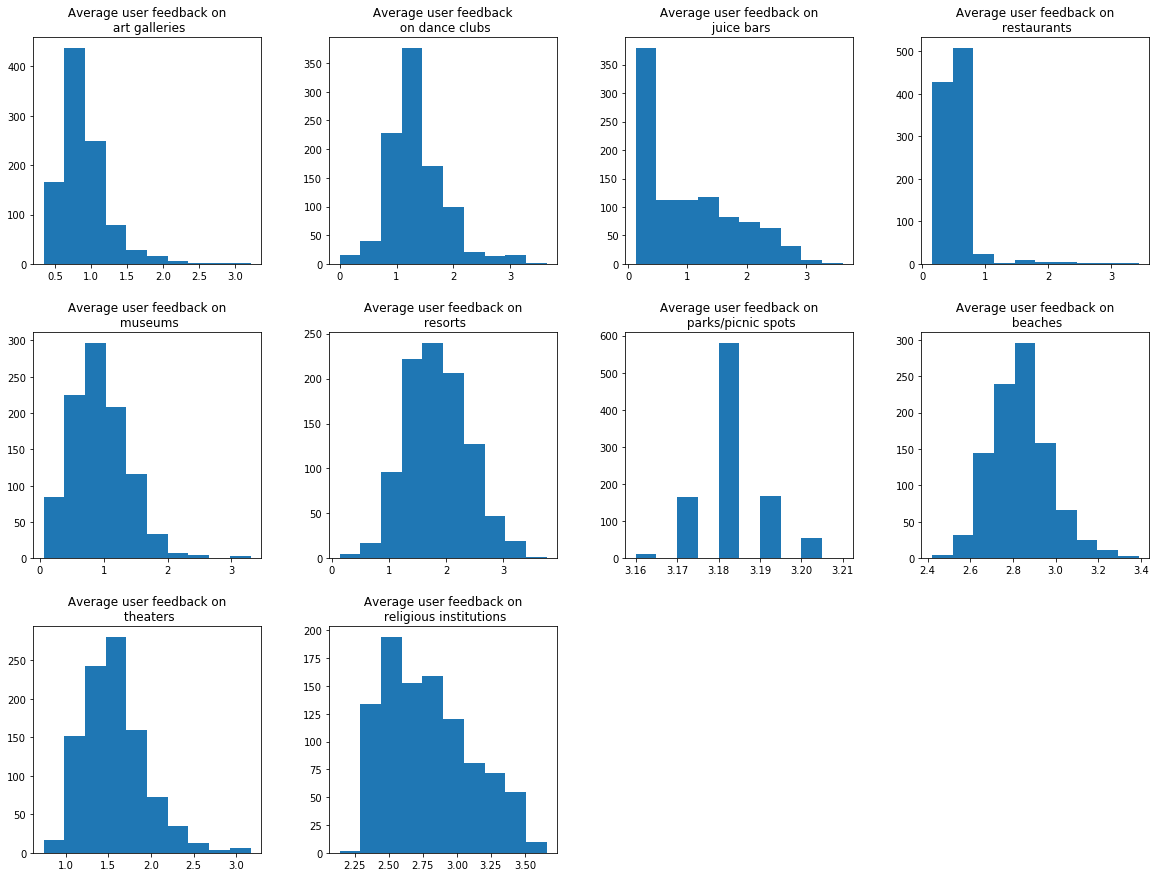

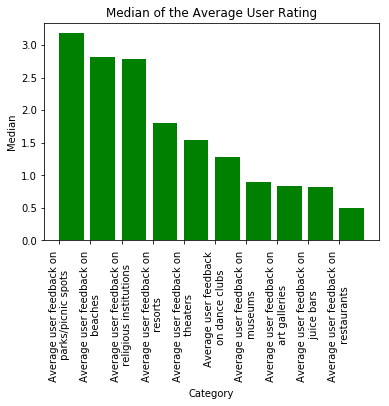

In [9]:
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 11):
    plt.subplot(3, 4, i)
    plt.hist(df[df.columns[i]])
    plt.title(categories[i-1])
plt.show()
med_list=[]
for i in range(1, 11):
    a=np.median(df[df.columns[i]])
    b=categories[i-1]
    med_list.append([b,a])
df_med=pd.DataFrame(med_list,columns=['Category','Median Average Rating']).\
        sort_values(['Median Average Rating'], ascending=False)
plt.bar(df_med['Category'],df_med['Median Average Rating'], color='green', align="edge")
plt.xticks(rotation=90)
plt.title('Median of the Average User Rating')
plt.ylabel('Median')
plt.xlabel('Category')
plt.show()

# Two Dimensional Exploratory Data Analysis (pairs of Tourism Types)

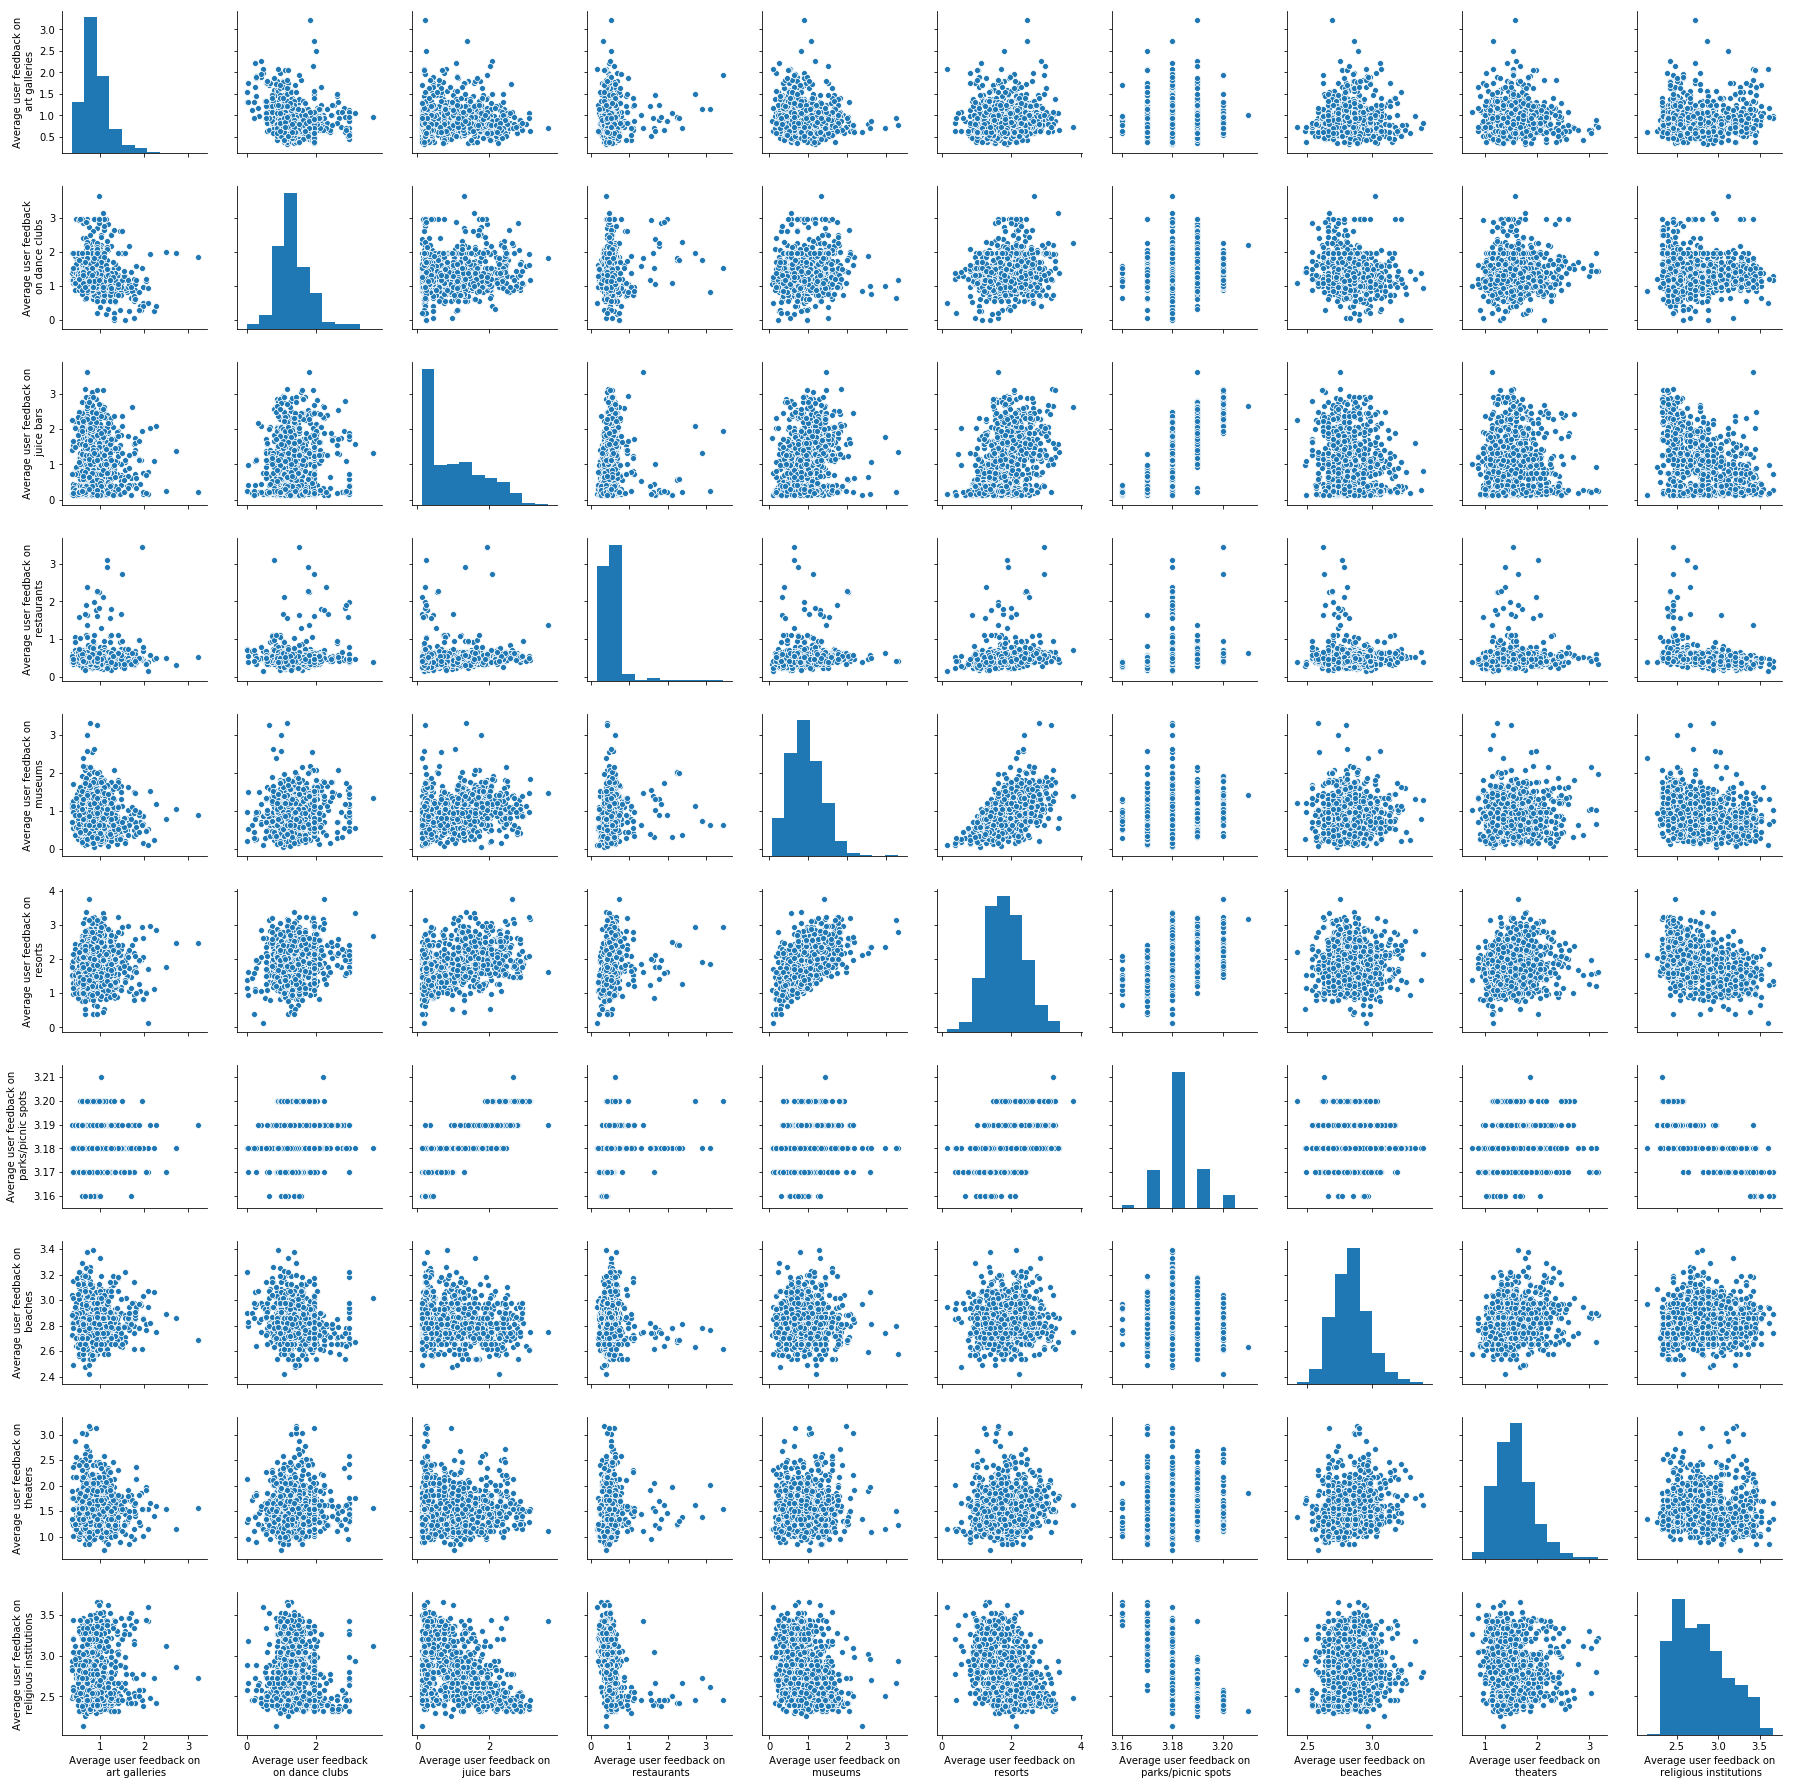

In [10]:
figout=sns.pairplot(df)
plt.savefig('figout.png')

# Setting up Integer Nonlinear Program 
(see command line for running)

In [16]:
#Sample size
n=20
#Number of Clusters
k=3

#Define the model
model = AbstractModel()

#Define the INDEX UPPER BOUND
model.n = Param(within=NonNegativeIntegers, initialize=n)
model.k = Param(within=NonNegativeIntegers, initialize=k)

#Define the RANGE OF INDICES for decision variables and parameters
model.I = RangeSet(1, model.n)
model.J = RangeSet(1, model.k)

#Define PARAMETERS for the CONSTRAINTS and the OBJECTIVE FUNCTION
a_dict={}
for i in range(1,n+1):
    for j in range(1,k+1):
        a_dict[i,j]=1              
model.a = Param(model.I, model.J, initialize=a_dict)

D_dict={}
for i in range(1,n+1):
    for j in range(1,k+1):
        D_dict[i,j]=1              
model.D = Param(model.I, model.J, initialize=D_dict)

b_dict={}
for i in range(1,n+1):
    b_dict[i]=1
model.b = Param(model.I, initialize=b_dict)

d_dict={}
for i in range(1,k+1):
    d_dict[i]=1
model.d = Param(model.J, initialize=d_dict)

c_dict={}
for i in range(1,n+1):
    for j in range(1,k+1):
        c_dict[i,j]=1
model.c = Param(model.I, model.J, initialize=c_dict)

# Define the BINARY DECISION VARIABLES
model.x = Var(model.I, model.J, domain=Binary)

# Define the OBJECTIVE FUNCTION
def obj_expression(model):
    return summation(INSERT OBJECTIVE FUNCTION HERE)
model.OBJ = Objective(rule=obj_expression)

#Define the CONSTRAINTS
def all_objects_to_a_cluster_constraint_rule(model, i):
    return sum(model.a[i,j] * model.x[i,j] for j in model.J) >= model.b[i]
model.AxbConstraint = Constraint(model.I, rule=all_objects_to_a_cluster_constraint_rule)
def at_least_one_object_per_cluster_constraint_rule(model, i):
    return sum(model.D[i,j] * model.x[i,j] for i in model.I) >= model.d[j]
model.DxdConstraint = Constraint(model.J, rule=at_least_one_object_per_cluster_constraint_rule)

# Clustering with K-means Algorithm (ie. Lloyd's Algorithm)

In [35]:
#Clustering the  data points into 3 clusters
kmeans=KMeans(n_clusters=3).fit(df[df.columns[1:len(df.columns)]])

In [36]:
#What are the cluster labels assigned?
df['predicted_cluster']=kmeans.labels_
df.head()

,User ID,Average user feedback on art galleries,Average user feedback on dance clubs,Average user feedback on juice bars,Average user feedback on restaurants,Average user feedback on museums,Average user feedback on resorts,Average user feedback on parks/picnic spots,Average user feedback on beaches,Average user feedback on theaters,Average user feedback on religious institutions,predicted_cluster
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,0
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,0
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,1
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,1
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,2


# The Elbow Method
- Is this data "clusterable?"
- What is the best number of clusters to ask for?

In [22]:
#What happens if we run it multiple times (asking for different cluster numbers?
cluster_num_list=range(1,8)
avg_inertia_list=[]
for k in cluster_num_list:
    print('k= '+str(k))
    for i in range(0,3):
        sub_inertia_list=[]
        kmeans=KMeans(n_clusters=k).fit(df[df.columns[1:len(df.columns)]])
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))

k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7


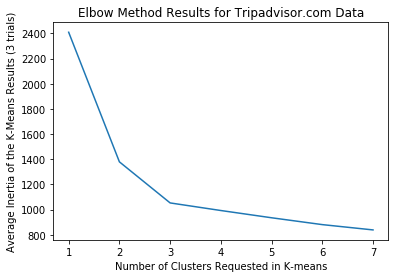

In [23]:
plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Tripadvisor.com Data')
plt.show()

# Can we Determine Any Attributes (Characteristics from these 2 Clusters)?

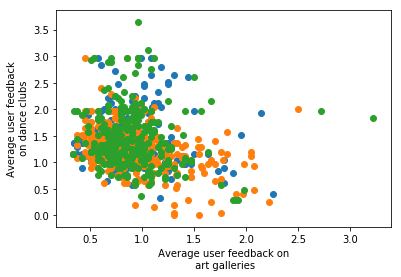

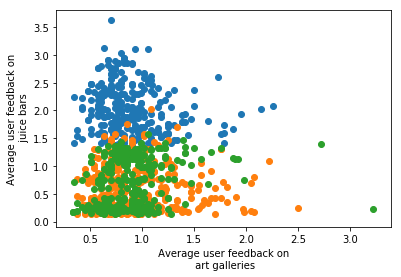

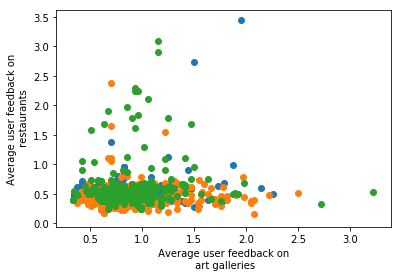

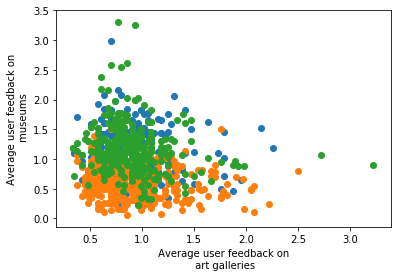

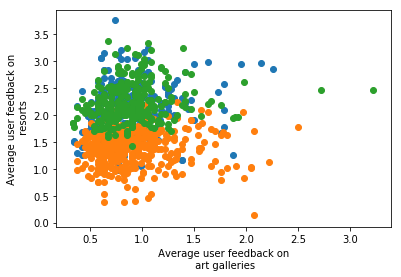

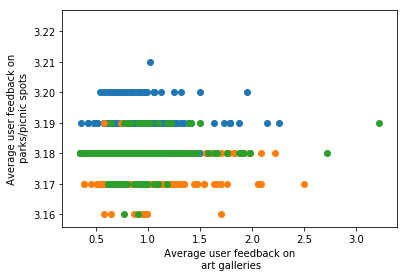

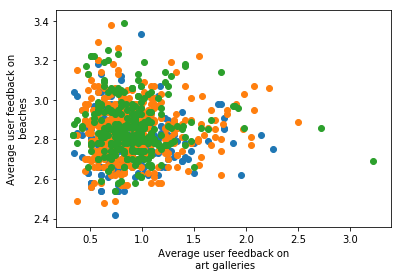

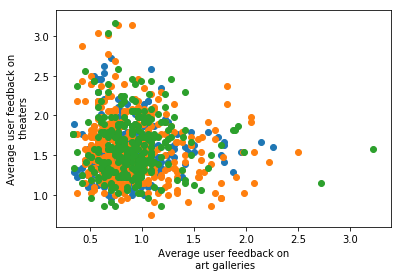

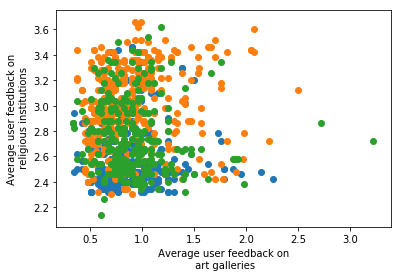

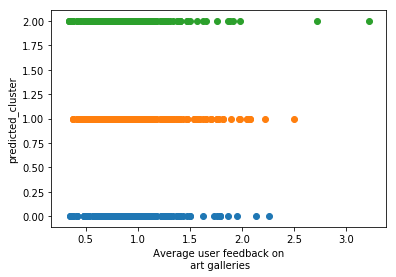

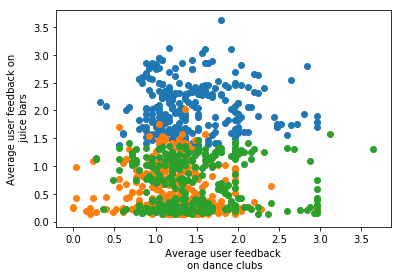

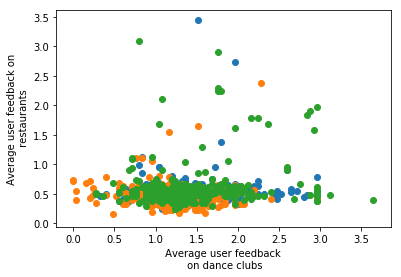

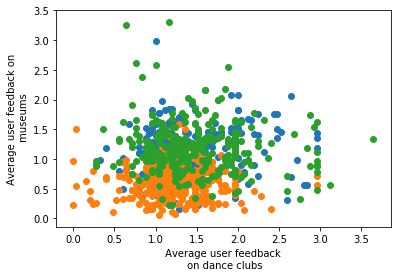

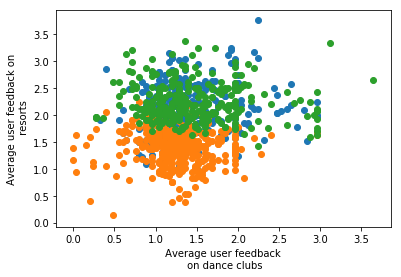

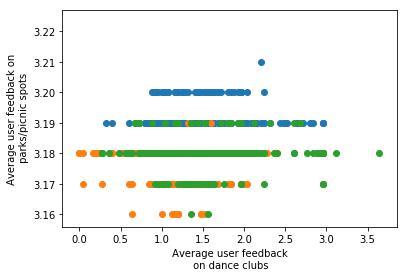

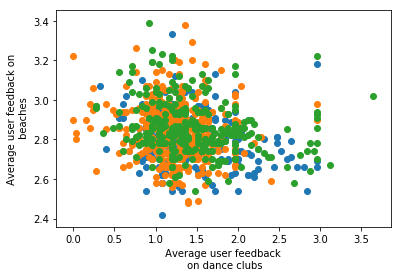

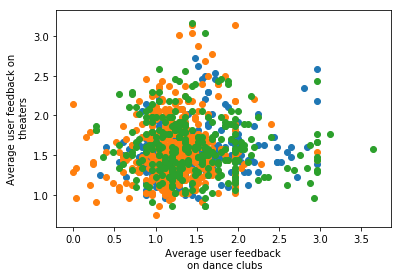

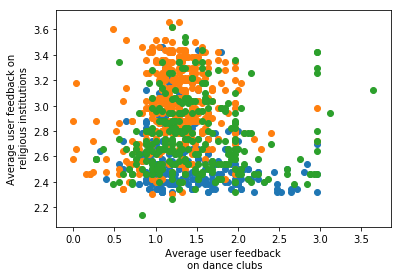

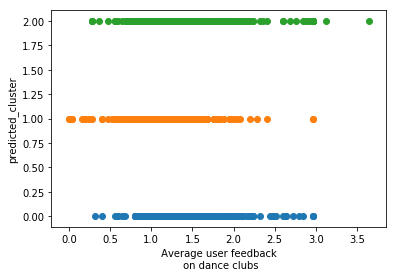

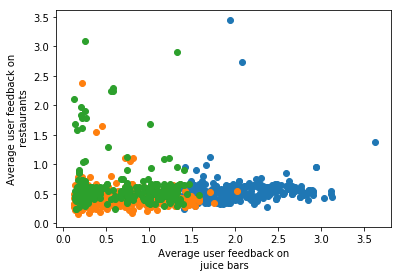

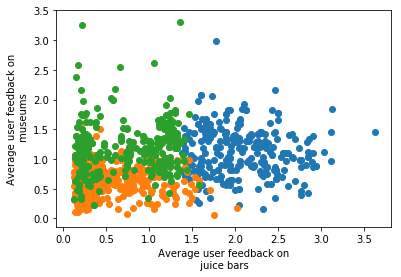

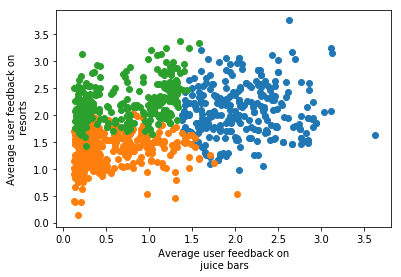

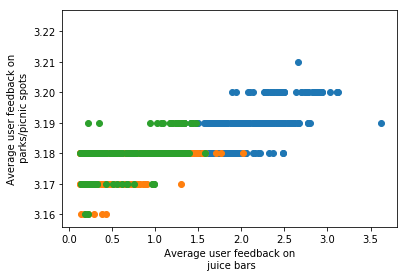

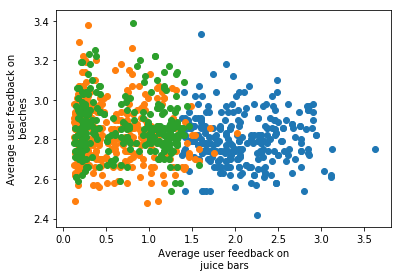

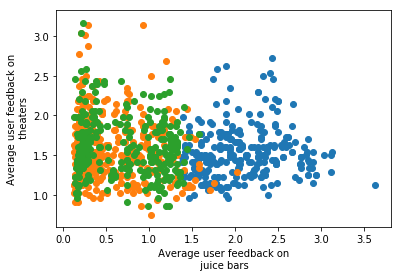

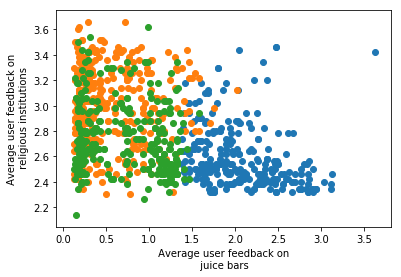

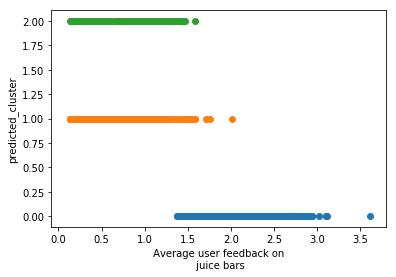

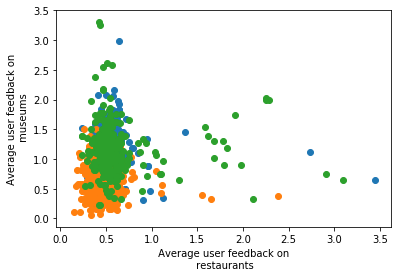

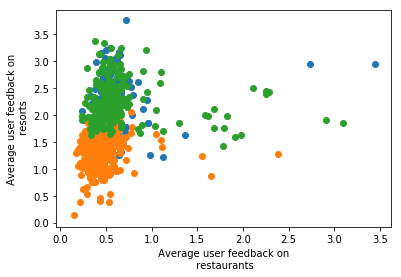

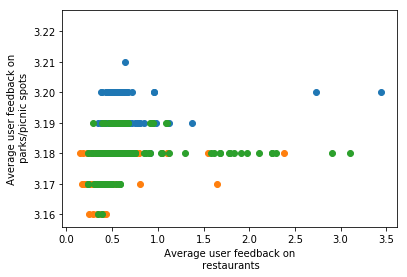

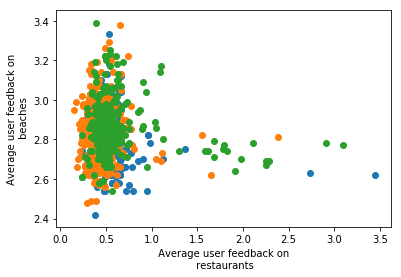

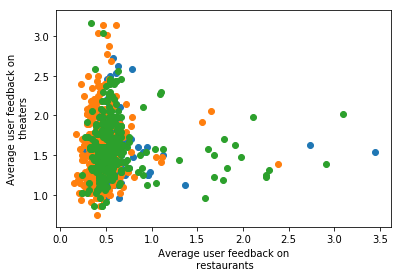

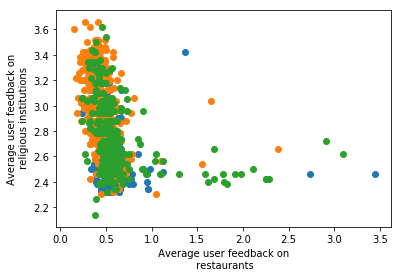

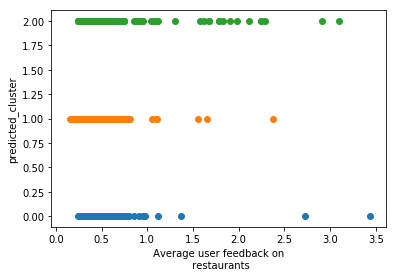

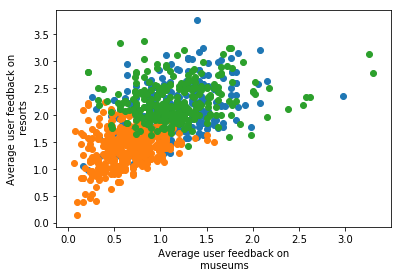

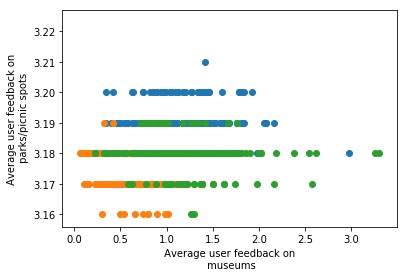

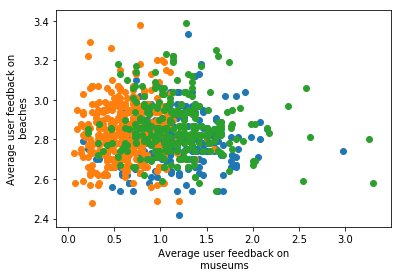

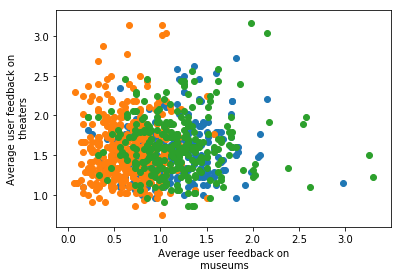

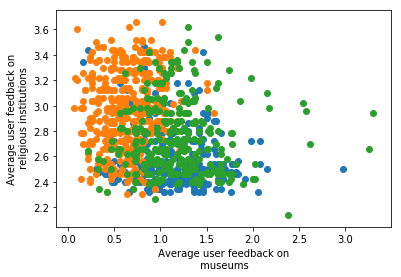

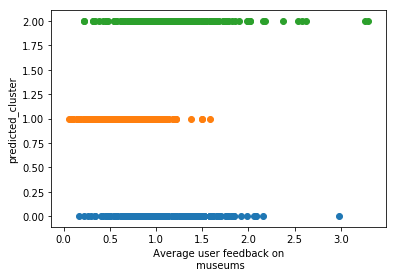

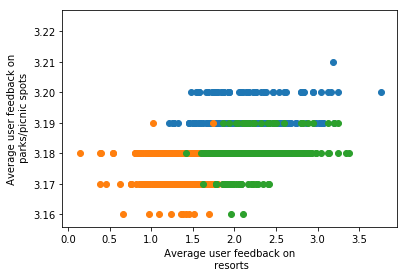

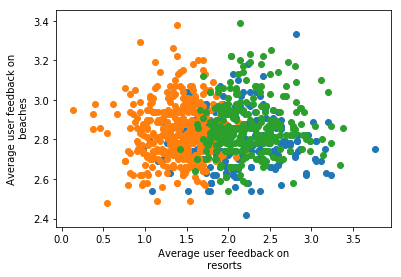

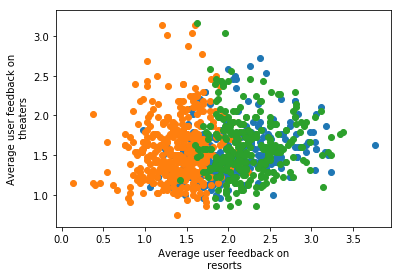

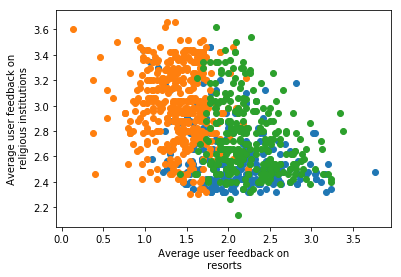

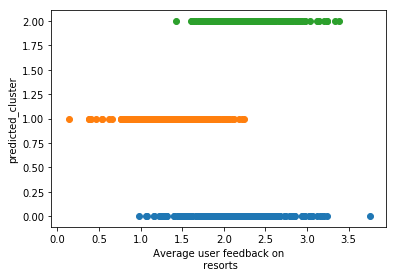

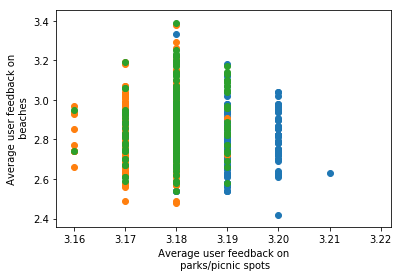

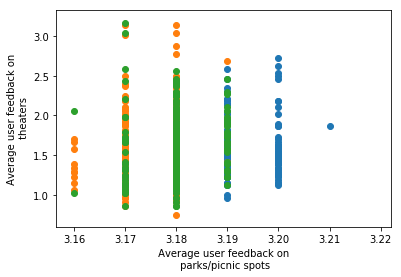

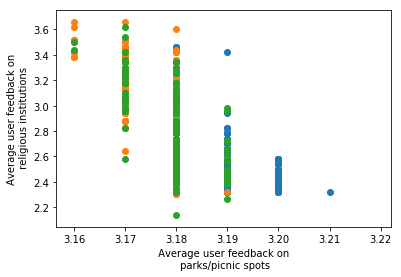

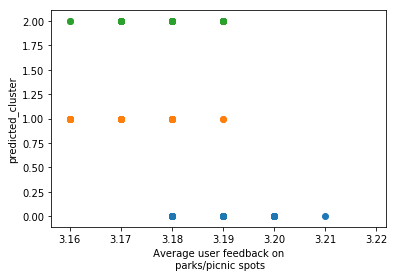

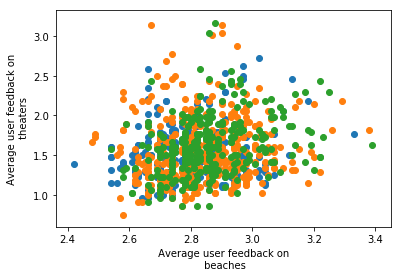

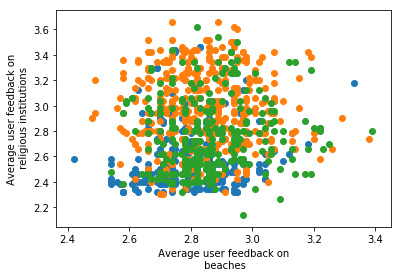

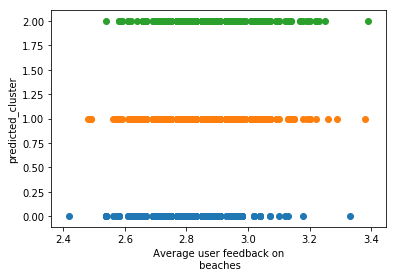

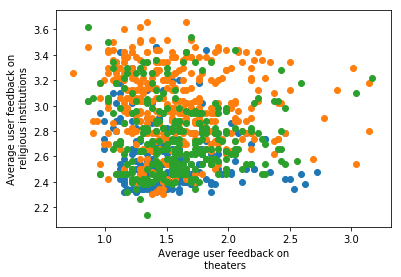

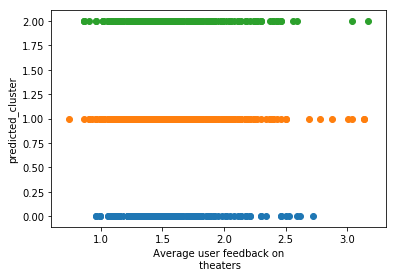

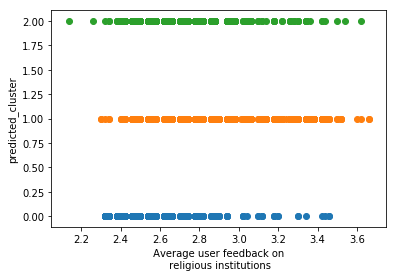

In [37]:
for i in range(1,len(df.columns)-1):
    for j in range(i+1,len(df.columns)):
        for k in range(0,3):
            plt.scatter(df[df.predicted_cluster==k][df.columns[i]], df[df.predicted_cluster==k][df.columns[j]])
            plt.xlabel(df.columns[i])
            plt.ylabel(df.columns[j])
        plt.show()

In [25]:
df

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,predicted_cluster
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,2
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,2
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,0
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,0
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,1
5,User 6,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66,0
6,User 7,0.90,1.36,0.26,0.32,0.86,1.58,3.17,2.66,1.22,3.22,0
7,User 8,0.74,1.40,0.22,0.41,0.82,1.50,3.17,2.81,1.54,2.88,0
8,User 9,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54,1
9,User 10,0.70,1.36,0.22,0.26,1.50,1.54,3.17,2.82,2.24,3.12,0
